# Kaggle House Price 데이터 실습
> ### <진행 순서>
> #### 1. Data Loading
> #### 2. EDA
> #### 3. Data Preprocessing
> #### 4. Model Fitting 
> #### 5. Evaluation



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Data Loading


In [2]:
import os
mydir = os.getcwd() + '/train.csv'

housetrn = pd.read_csv(mydir)


In [3]:
# 가져온 자료의 shape 확인 -> 81개의 칼럼과 1460개의 행이 보인다.
housetrn.shape

(1460, 81)

In [4]:
# 카테고리컬에 해당하는 변수 확인해보기 -> 더미변수화 필요
housetrn.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
# 칼럼 확인 많은 변수가 보인다. 
# let us check the columsn that are part of the input file
print (housetrn.columns)
# Because the number of columns are large, we can set to display all columns
pd.options.display.max_columns = 999
print (pd.options.display.max_columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# 데이터셋의 상단만을 가져와 확인해보자.
# 카테고리 및 연속형 칼럼들이 보인다.
# 불필요한 index , NaN등도 삭제할 필요성이 있겠다.
print (housetrn.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

### 2. EDA



In [7]:
# Seaborn을 사용한 데이터 분포 시각화
# https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

### 다음은 모든 피쳐중 하나와 y와의 스캐터플롯을 각각 그려본 결과

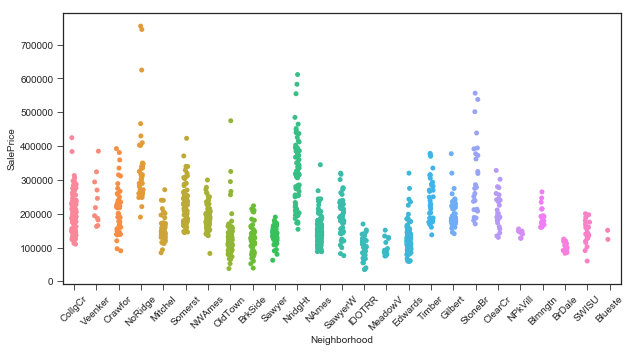

In [8]:
# 설명변수와 예측변수간의 stripplot을 그려보자.
# Let us do a scatterplot for the variable selected as HIGH
sns.set_style("whitegrid")
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.stripplot(x="Neighborhood", y="SalePrice", data=housetrn, jitter=True)
plt.xticks(rotation=45)
plt.show()

Neighborhood에 따라 y축의 Price 분포가 상이
집 값을 떨어뜨리는 혹은 높이는 변수가 존재함을 유추할 수 있다. 

In [9]:
housetrn['BldgType']

0         1Fam
1         1Fam
2         1Fam
3         1Fam
4         1Fam
5         1Fam
6         1Fam
7         1Fam
8         1Fam
9       2fmCon
10        1Fam
11        1Fam
12        1Fam
13        1Fam
14        1Fam
15        1Fam
16        1Fam
17      Duplex
18        1Fam
19        1Fam
20        1Fam
21        1Fam
22        1Fam
23      TwnhsE
24        1Fam
25        1Fam
26        1Fam
27        1Fam
28        1Fam
29        1Fam
         ...  
1430      1Fam
1431    TwnhsE
1432      1Fam
1433      1Fam
1434      1Fam
1435      1Fam
1436      1Fam
1437      1Fam
1438      1Fam
1439      1Fam
1440      1Fam
1441    TwnhsE
1442      1Fam
1443      1Fam
1444      1Fam
1445      1Fam
1446      1Fam
1447      1Fam
1448      1Fam
1449     Twnhs
1450    Duplex
1451      1Fam
1452    TwnhsE
1453      1Fam
1454      1Fam
1455      1Fam
1456      1Fam
1457      1Fam
1458      1Fam
1459      1Fam
Name: BldgType, dtype: object

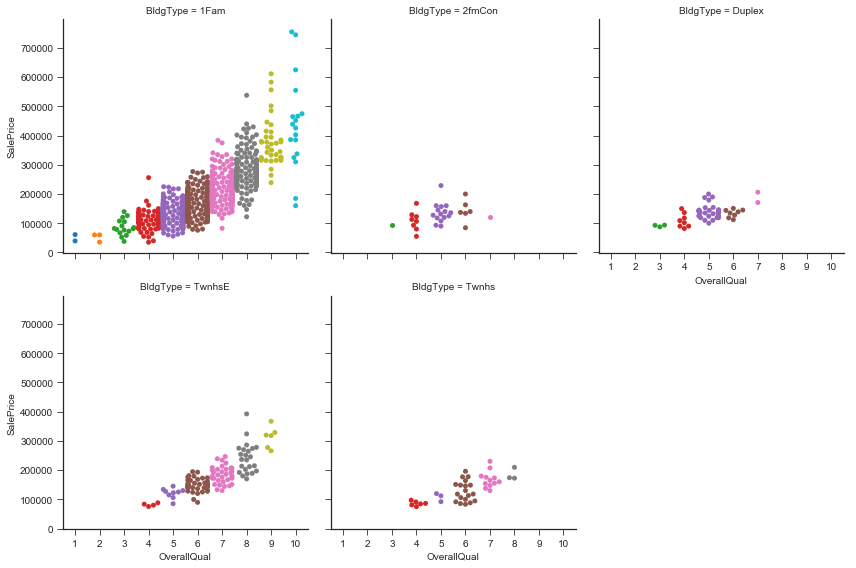

In [10]:
## OverallQual와 BldgType , price 간의 factorplot
# factorplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.
sns.set_style('ticks')
sns.factorplot(x="OverallQual", y="SalePrice", col="BldgType", data=housetrn, kind="swarm", col_wrap=3)
fig.set_size_inches(5, 4)
plt.show()

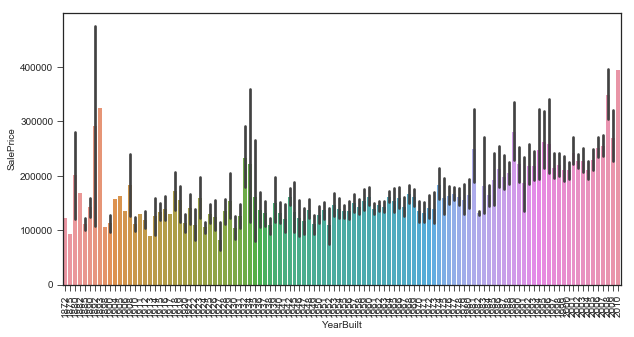

In [11]:
## 년도와 price간의 barplot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(x="YearBuilt", y="SalePrice", data=housetrn)
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.show()

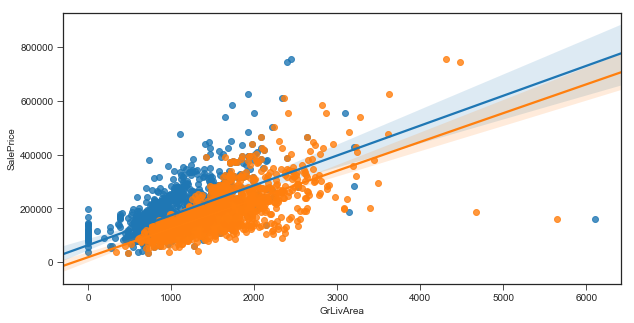

In [12]:
## TotalBsmtSF와 price간의 regplot
## GrLivArea와 price간의 regplot
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=housetrn)
sns.regplot(x="GrLivArea", y="SalePrice", data=housetrn)
plt.show()

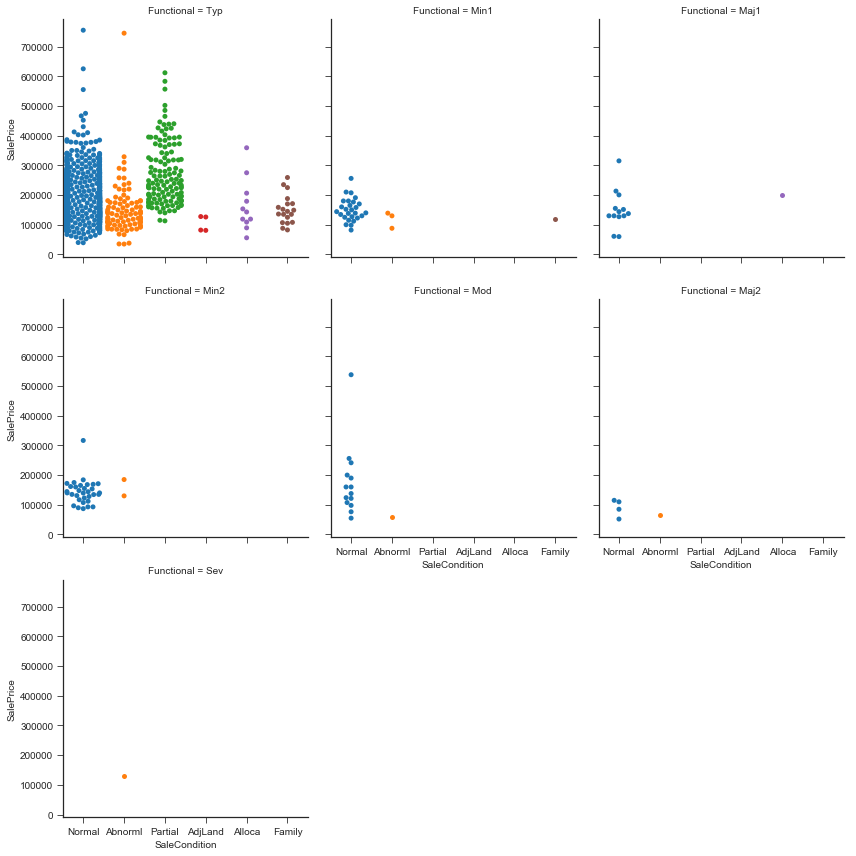

In [13]:
## SaleCondition와 price 간의 factorplot
sns.factorplot(x="SaleCondition", y="SalePrice", col="Functional", data=housetrn, kind="swarm", col_wrap=3)
plt.show()

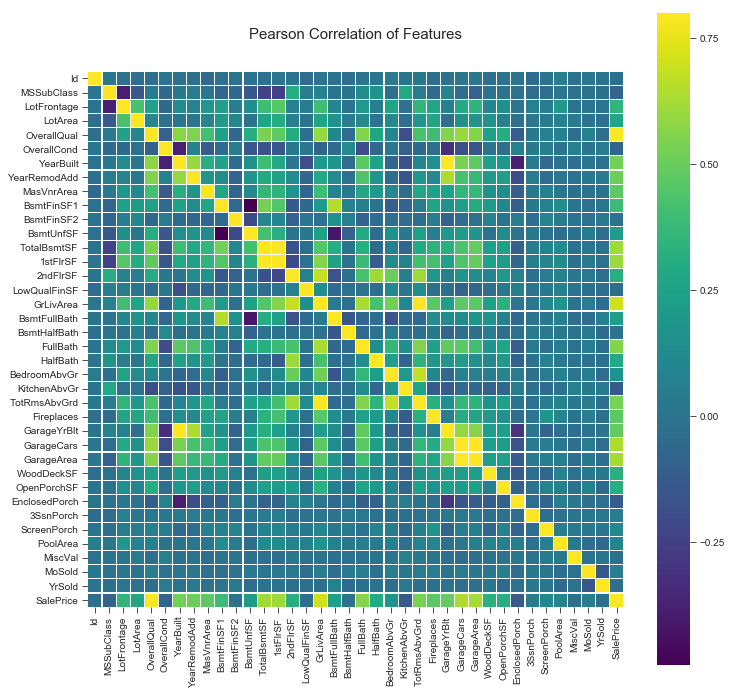

In [14]:
# 변수간의 correlation 확인
# Plotting the Pearson correlation of the different features
corr_matrix = housetrn.corr()
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_matrix,linewidths=0.1,vmax=0.8, square=True, cmap=colormap, linecolor='white')
plt.show()

- 노란색일수록 양의 상관 남색일수록 음의 상관이 강하다.
- 몇몇 변수간의 뚜렷한 양/음의 상관이 보인다.


### 3. Data preprocessing


In [15]:
# 의미없다고 판단되는 변수는 빼고 분석하자. 
#newhousetrn = housetrn
newhousetrn = housetrn[['Id', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',  'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars','GarageArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd','Functional', 'SalePrice']]


In [16]:
print (newhousetrn.head())

   Id  LotFrontage  MasVnrArea  BsmtFinSF1  OverallQual  TotalBsmtSF  \
0   1         65.0       196.0         706            7          856   
1   2         80.0         0.0         978            6         1262   
2   3         68.0       162.0         486            7          920   
3   4         60.0         0.0         216            7          756   
4   5         84.0       350.0         655            8         1145   

   1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0       856       1710         2             8           0       2003.0   
1      1262       1262         2             6           1       1976.0   
2       920       1786         2             6           1       2001.0   
3       961       1717         1             7           1       1998.0   
4      1145       2198         2             9           1       2000.0   

   GarageCars  GarageArea Neighborhood  YearBuilt  YearRemodAdd Functional  \
0           2         548      CollgCr

In [17]:
# missing values 확인 
total = newhousetrn.isnull().sum().sort_values(ascending=False)
percent = (newhousetrn.isnull().sum()/newhousetrn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data)

              Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
SalePrice         0  0.000000
FullBath          0  0.000000
BsmtFinSF1        0  0.000000
OverallQual       0  0.000000
TotalBsmtSF       0  0.000000
1stFlrSF          0  0.000000
GrLivArea         0  0.000000
TotRmsAbvGrd      0  0.000000
Functional        0  0.000000
Fireplaces        0  0.000000
GarageCars        0  0.000000
GarageArea        0  0.000000
Neighborhood      0  0.000000
YearBuilt         0  0.000000
YearRemodAdd      0  0.000000
Id                0  0.000000


LotFrontage, GarageYrBlt, MasVnrArea 세 변수에 대해 missing values처리가 필요!

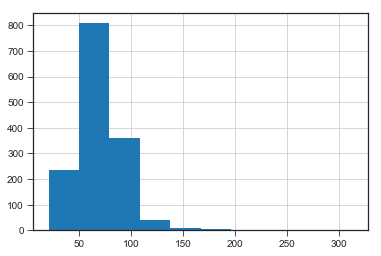

In [18]:
# LotFrontage 변수 미싱밸류 처리
# mean +- std 를 랜덤으로 집어넣기
lot_av = newhousetrn.LotFrontage.mean()
lot_sd = newhousetrn.LotFrontage.std()
tot_mislot = newhousetrn.LotFrontage.isnull().sum()
rand_lot= np.random.randint(lot_av - lot_sd, lot_av + lot_sd, size=tot_mislot)
newhousetrn['LotFrontage'][np.isnan(newhousetrn['LotFrontage'])] = rand_lot
newhousetrn['LotFrontage'] = newhousetrn['LotFrontage'].astype(int)
newhousetrn.LotFrontage.hist()
plt.show()

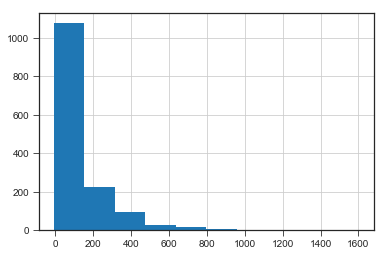

In [19]:
# MasVnrArea에 대해 같은 작업 반복
mva_av = newhousetrn.MasVnrArea.mean()
mva_sd = newhousetrn.MasVnrArea.std()
tot_mismva = newhousetrn.MasVnrArea.isnull().sum()
rand_mva= np.random.randint(mva_av - mva_sd, mva_av + mva_sd, size=tot_mismva)
newhousetrn['MasVnrArea'][np.isnan(newhousetrn['MasVnrArea'])] = rand_mva
newhousetrn['MasVnrArea'] = newhousetrn['MasVnrArea'].astype(int)
newhousetrn.MasVnrArea.hist()
plt.show()

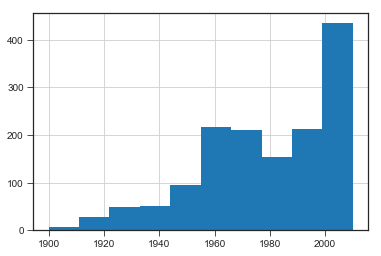

In [20]:
# GarageYrBlt에도 같은 작업 반복 
gyr_av = newhousetrn.GarageYrBlt.mean()
gyr_sd = newhousetrn.GarageYrBlt.std()
tot_misgyr = newhousetrn.GarageYrBlt.isnull().sum()
rand_gyr= np.random.randint(gyr_av - gyr_sd, gyr_av + gyr_sd, size=tot_misgyr)
newhousetrn['GarageYrBlt'][np.isnan(newhousetrn['GarageYrBlt'])] = rand_gyr
newhousetrn['GarageYrBlt'] = newhousetrn['GarageYrBlt'].astype(int)
newhousetrn.GarageYrBlt.hist()
plt.show()

In [21]:
# missing values처리 확인
total = newhousetrn.isnull().sum().sort_values(ascending=False)
percent = (newhousetrn.isnull().sum()/newhousetrn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data)

              Total  Percent
SalePrice         0      0.0
FullBath          0      0.0
LotFrontage       0      0.0
MasVnrArea        0      0.0
BsmtFinSF1        0      0.0
OverallQual       0      0.0
TotalBsmtSF       0      0.0
1stFlrSF          0      0.0
GrLivArea         0      0.0
TotRmsAbvGrd      0      0.0
Functional        0      0.0
Fireplaces        0      0.0
GarageYrBlt       0      0.0
GarageCars        0      0.0
GarageArea        0      0.0
Neighborhood      0      0.0
YearBuilt         0      0.0
YearRemodAdd      0      0.0
Id                0      0.0


In [22]:
# 데이터타입 중 카테고리형(object)을 바꿀 필요성이 있다. 
newhousetrn.dtypes

Id               int64
LotFrontage      int32
MasVnrArea       int32
BsmtFinSF1       int64
OverallQual      int64
TotalBsmtSF      int64
1stFlrSF         int64
GrLivArea        int64
FullBath         int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageYrBlt      int32
GarageCars       int64
GarageArea       int64
Neighborhood    object
YearBuilt        int64
YearRemodAdd     int64
Functional      object
SalePrice        int64
dtype: object

In [23]:
# Encoding the Categorical variables
cols_to_transform = newhousetrn[['Id', 'Neighborhood', 'Functional']]
newcols = pd.get_dummies(cols_to_transform)

In [24]:
newcols.head()

,Id,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
# 기존 칼럼 제거
del newhousetrn['Neighborhood'] # 또는 newhousetrn = newhousetrn.drop(labels=["Neighborhood"], axis=1)

del newhousetrn['Functional']

In [26]:
# 더미변수화 한 열을 join
fhoustrn = newhousetrn.merge(newcols, how='inner', on='Id' )
fhoustrn.head()

,Id,LotFrontage,MasVnrArea,BsmtFinSF1,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,1,65,196,706,7,856,856,1710,2,8,0,2003,2,548,2003,2003,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,80,0,978,6,1262,1262,1262,2,6,1,1976,2,460,1976,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,68,162,486,7,920,920,1786,2,6,1,2001,2,608,2001,2002,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,60,0,216,7,756,961,1717,1,7,1,1998,3,642,1915,1970,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,84,350,655,8,1145,1145,2198,2,9,1,2000,3,836,2000,2000,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
fhoustrn.shape

(1460, 49)

### train_test_split

In [28]:
from sklearn.model_selection import train_test_split
y = housetrn.SalePrice
#del fhoustrn['SalePrice']
X = fhoustrn[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

### Normalize

In [29]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(y_train.reshape(-1,1))
y_train = std_scale.transform(y_train.reshape(-1,1))

In [30]:
# Scaler이용 
# Standardizing for the unscaled 15 variables in X_train
from sklearn import preprocessing
std_scale1 = preprocessing.StandardScaler().fit(X_train[['OverallQual']])
X_train[['OverallQual']] = std_scale1.transform(X_train[['OverallQual']])
std_scale2 = preprocessing.StandardScaler().fit(X_train[['TotalBsmtSF']])
X_train[['TotalBsmtSF']] = std_scale2.transform(X_train[['TotalBsmtSF']])
std_scale3 = preprocessing.StandardScaler().fit(X_train[['1stFlrSF']])
X_train[['1stFlrSF']] = std_scale3.transform(X_train[['1stFlrSF']])
std_scale4 = preprocessing.StandardScaler().fit(X_train[['GrLivArea']])
X_train[['GrLivArea']] = std_scale4.transform(X_train[['GrLivArea']])
std_scale5 = preprocessing.StandardScaler().fit(X_train[['FullBath']])
X_train[['FullBath']] = std_scale5.transform(X_train[['FullBath']])
std_scale6 = preprocessing.StandardScaler().fit(X_train[['GarageArea']])
X_train[['GarageArea']] = std_scale6.transform(X_train[['GarageArea']])
std_scale7 = preprocessing.StandardScaler().fit(X_train[['YearBuilt']])
X_train[['YearBuilt']] = std_scale7.transform(X_train[['YearBuilt']])
std_scale8 = preprocessing.StandardScaler().fit(X_train[['LotFrontage']])
X_train[['LotFrontage']] = std_scale8.transform(X_train[['LotFrontage']])
std_scale9 = preprocessing.StandardScaler().fit(X_train[['MasVnrArea']])
X_train[['MasVnrArea']] = std_scale9.transform(X_train[['MasVnrArea']])
std_scale10 = preprocessing.StandardScaler().fit(X_train[['BsmtFinSF1']])
X_train[['BsmtFinSF1']] = std_scale10.transform(X_train[['BsmtFinSF1']])
std_scale11 = preprocessing.StandardScaler().fit(X_train[['TotRmsAbvGrd']])
X_train[['TotRmsAbvGrd']] = std_scale11.transform(X_train[['TotRmsAbvGrd']])
std_scale12 = preprocessing.StandardScaler().fit(X_train[['Fireplaces']])
X_train[['TotRmsAbvGrd']] = std_scale12.transform(X_train[['Fireplaces']])
std_scale13 = preprocessing.StandardScaler().fit(X_train[['GarageYrBlt']])
X_train[['GarageYrBlt']] = std_scale13.transform(X_train[['GarageYrBlt']])
std_scale14 = preprocessing.StandardScaler().fit(X_train[['GarageCars']])
X_train[['GarageCars']] = std_scale14.transform(X_train[['GarageCars']])
std_scale15 = preprocessing.StandardScaler().fit(X_train[['YearRemodAdd']])
X_train[['YearRemodAdd']] = std_scale15.transform(X_train[['YearRemodAdd']])

In [31]:
X_train.head()

,Id,LotFrontage,MasVnrArea,BsmtFinSF1,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
89,90,-0.437666,-0.610876,0.390062,-1.655449,-0.191765,-0.495548,-1.033732,-1.074564,-0.929803,0,-0.794282,-2.548254,-2.400101,0.745173,0.504168,123600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
848,849,0.272852,-0.610876,-1.044911,-0.097798,-0.397368,0.373870,1.622851,2.545889,0.624601,1,-2.796905,0.284577,-0.583853,-2.038638,0.600641,240000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1114,1115,0.983370,-0.610876,-0.032132,-0.876624,-0.580678,-0.926143,-1.338617,-1.074564,-0.929803,0,-0.914440,-1.131839,-0.755388,-0.549623,0.745349,117000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1395,1396,0.888634,0.867010,-1.044911,1.459854,0.065860,-0.103350,1.863652,0.735663,0.624601,1,1.088183,1.700992,0.838874,1.101241,1.034767,281213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
753,754,0.509691,0.462854,-1.044911,1.459854,-0.092678,-0.363901,1.117945,0.735663,0.624601,1,1.088183,1.700992,2.029526,1.101241,0.986531,275500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# Let us apply the same technique of rescaling for the Test data set too
std_scale0 = preprocessing.StandardScaler().fit(y_test.reshape(-1,1))
y_test = std_scale0.transform(y_test.reshape(-1,1))

std_scale16 = preprocessing.StandardScaler().fit(X_test[['OverallQual']])
X_test[['OverallQual']] = std_scale16.transform(X_test[['OverallQual']])
std_scale17 = preprocessing.StandardScaler().fit(X_test[['TotalBsmtSF']])
X_test[['TotalBsmtSF']] = std_scale17.transform(X_test[['TotalBsmtSF']])
std_scale18 = preprocessing.StandardScaler().fit(X_test[['1stFlrSF']])
X_test[['1stFlrSF']] = std_scale18.transform(X_test[['1stFlrSF']])
std_scale19 = preprocessing.StandardScaler().fit(X_test[['GrLivArea']])
X_test[['GrLivArea']] = std_scale19.transform(X_test[['GrLivArea']])
std_scale20 = preprocessing.StandardScaler().fit(X_test[['FullBath']])
X_test[['FullBath']] = std_scale20.transform(X_test[['FullBath']])
std_scale21 = preprocessing.StandardScaler().fit(X_test[['GarageArea']])
X_test[['GarageArea']] = std_scale21.transform(X_test[['GarageArea']])
std_scale22 = preprocessing.StandardScaler().fit(X_test[['YearBuilt']])
X_test[['YearBuilt']] = std_scale22.transform(X_test[['YearBuilt']])
std_scale23 = preprocessing.StandardScaler().fit(X_test[['LotFrontage']])
X_test[['LotFrontage']] = std_scale23.transform(X_test[['LotFrontage']])
std_scale24 = preprocessing.StandardScaler().fit(X_test[['MasVnrArea']])
X_test[['MasVnrArea']] = std_scale24.transform(X_test[['MasVnrArea']])
std_scale25 = preprocessing.StandardScaler().fit(X_test[['BsmtFinSF1']])
X_test[['BsmtFinSF1']] = std_scale25.transform(X_test[['BsmtFinSF1']])
std_scale26 = preprocessing.StandardScaler().fit(X_test[['TotRmsAbvGrd']])
X_test[['TotRmsAbvGrd']] = std_scale26.transform(X_test[['TotRmsAbvGrd']])
std_scale27 = preprocessing.StandardScaler().fit(X_test[['Fireplaces']])
X_test[['TotRmsAbvGrd']] = std_scale27.transform(X_test[['Fireplaces']])
std_scale28 = preprocessing.StandardScaler().fit(X_test[['GarageYrBlt']])
X_test[['GarageYrBlt']] = std_scale28.transform(X_test[['GarageYrBlt']])
std_scale29 = preprocessing.StandardScaler().fit(X_test[['GarageCars']])
X_test[['GarageCars']] = std_scale29.transform(X_test[['GarageCars']])
std_scale30 = preprocessing.StandardScaler().fit(X_test[['YearRemodAdd']])
X_test[['YearRemodAdd']] = std_scale30.transform(X_test[['YearRemodAdd']])

In [33]:
X_test.head()


,Id,LotFrontage,MasVnrArea,BsmtFinSF1,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YearBuilt,YearRemodAdd,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
892,893,0.005514,-0.560302,0.448602,-0.061906,0.012924,-0.230589,-0.839286,-1.005986,-0.960542,0,-0.652490,-0.986716,-0.944397,-0.280775,0.873824,154500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1105,1106,1.200818,1.378453,1.226749,1.344052,0.905526,0.861983,2.094736,0.813692,2.141113,2,0.643897,0.322925,1.091614,0.756482,0.485416,325000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
413,414,-0.592138,-0.560302,-0.949531,-0.764885,-0.099757,-0.331753,-0.914808,-1.005986,0.590286,1,-2.157972,0.322925,-0.508109,-1.485331,-1.699383,115000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
522,523,-0.848275,-0.560302,-0.108120,-0.061906,-0.108594,-0.392451,0.285989,0.813692,2.141113,2,-1.196136,0.322925,-0.235429,-0.816133,-1.699383,159000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1036,1037,0.816613,-0.185405,1.205661,2.047031,1.252404,1.165475,0.202915,0.813692,0.590286,1,1.229362,1.632566,2.000548,1.191460,1.116580,315500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### 4. Model Fitting 

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

#### 1) 일반회귀

In [35]:
model1 = LinearRegression()
rst = model1.fit(X_train, y_train)
print(rst)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


#### 2) 릿지 

In [36]:
# Performing Grid Search with specific alpha values for Ridge
alphas = np.array([1,0.1,0.01,0.001,0.0001])
#alphas = np.logspace(-6, 6, 100)
model2 = Ridge()
grid_Ridge = GridSearchCV(model2, cv = 10,  param_grid = dict(alpha=alphas))
grid_Ridge.fit(X_train, y_train)
print(grid_Ridge)
# summarize the results of the grid search
print(grid_Ridge.best_score_)
print(grid_Ridge.best_estimator_.alpha)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
1.0
1.0


#### 3) 라쏘 해보기(직접)

In [ ]:
# Performing Grid Search with specific of alpha values for Lasso
alphas =



model3 =
grid_Lasso = GridSearchCV(estimator=, cv = , param_grid=)
grid_Lasso.fit(, )
print(grid_Lasso)

# summarize the results of the grid search
print(grid_Lasso.best_score_)
print(grid_Lasso.best_estimator_.alpha)

#### 4) Elastic net

In [ ]:
# Performing Grid Search specific alpha values for ElasticNet
alphas = np.array([1,0.1,0.01,0.001,0.0001])
#alphas = np.logspace(-6, 6, 100)

# param_grid = {'alpha': sp_rand(), 'l1_ratio': sp_rand()}
model4 = ElasticNet()
grid_ELN = GridSearchCV(estimator=model4, param_grid=dict(alpha=alphas))
# rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
grid_ELN.fit(X_train, y_train)
print(grid_ELN)
# summarize the results of the grid search
print(grid_ELN.best_score_)
print(grid_ELN.best_estimator_.alpha)

#### 5. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

#mean_squared_error(y_true, y_pred)
from sklearn.metrics import r2_score
# r2_score(y_true, y_pred)  

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_Ridge.predict(X_test)))

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_Lasso.predict(X_test)))

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_ELN.predict(X_test)))